## Analysis of All-Transactions House Price Index for California using STL and Prophet
datasource: https://fred.stlouisfed.org/series/CASTHPI

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error


In [43]:
DATASET_NAME = "CASTHPI"

<Axes: title={'center': 'All-Transactions House Price Index for California'}, xlabel='time', ylabel='Index value'>

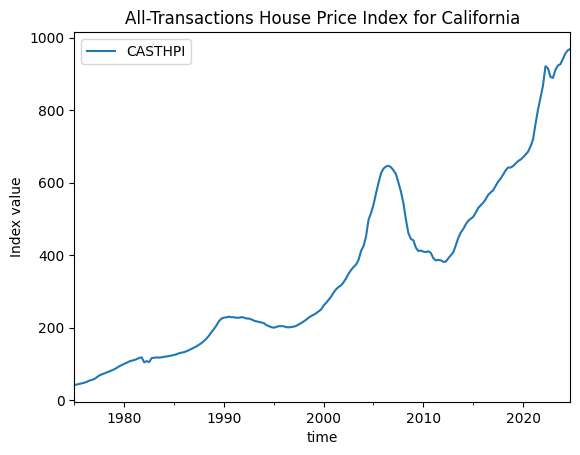

In [44]:
df = pd.read_csv(DATASET_NAME + '.csv')
df['observation_date'] = pd.to_datetime(df['observation_date'])
df.set_index('observation_date', inplace=True)

df.plot(
    xlabel='time', 
    ylabel='Index value', 
    title='All-Transactions House Price Index for California',
)

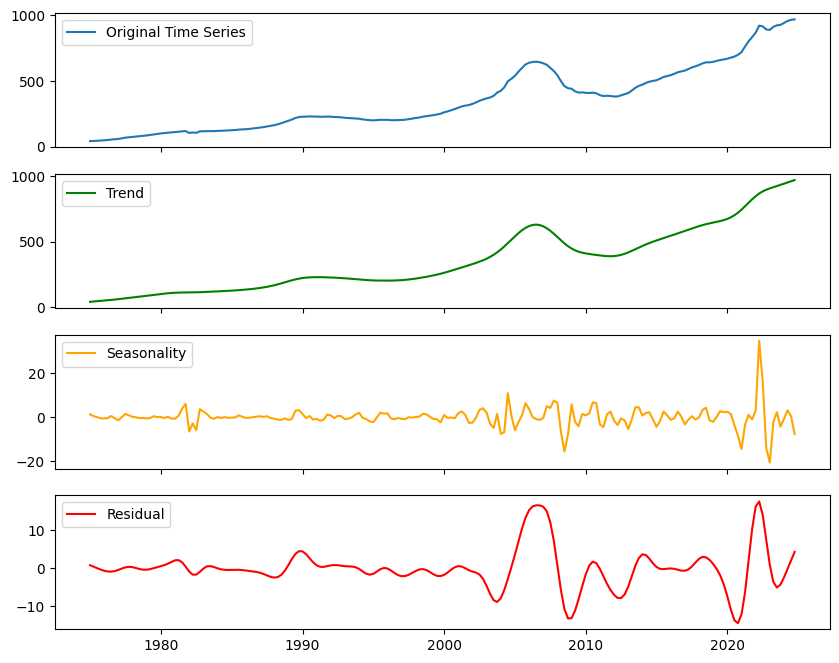

In [45]:
stl = STL(df[DATASET_NAME], seasonal=3)
result = stl.fit()

trend = result.trend
seasonal = result.seasonal
residual = result.resid

fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
axes[0].plot(df, label="Original Time Series")
axes[0].legend()
axes[1].plot(trend, label="Trend", color="green")
axes[1].legend()
axes[2].plot(seasonal, label="Seasonality", color="orange")
axes[2].legend()
axes[3].plot(residual, label="Residual", color="red")
axes[3].legend()
plt.show()


In [46]:
df.reset_index(inplace=True)
df.rename(columns={'observation_date': 'ds', DATASET_NAME: 'y'}, inplace=True)
df.head()

,ds,y
0,1975-01-01,41.69
1,1975-04-01,42.77
2,1975-07-01,44.35
3,1975-10-01,45.78
4,1976-01-01,47.82


test size: 40


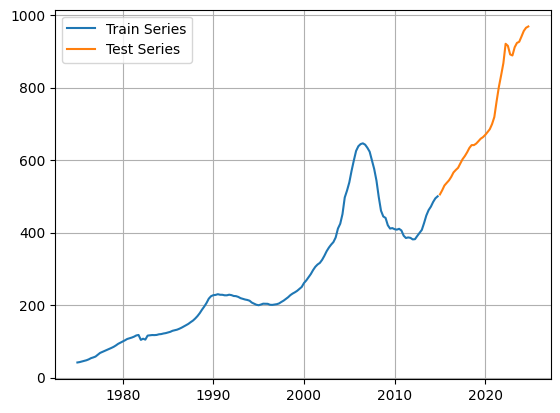

In [47]:
test_size = int(0.2 * len(df))
train_df = df.head(len(df) - test_size)
test_df = df.tail(test_size)
print("test size:", test_size)
plt.plot(train_df['ds'], train_df['y'], label = "Train Series")
plt.plot(test_df['ds'], test_df['y'], label = "Test Series")
plt.legend()
plt.grid()

In [48]:
model = Prophet()
model.fit(train_df)

16:14:00 - cmdstanpy - INFO - Chain [1] start processing
16:14:00 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
future = model.make_future_dataframe(periods=40, freq='Q') # 10 years ahead (40 quarters)
forecast = model.predict(future)
forecast.tail()

/home/rynowak/Dokumenty/Programy/EksploracjaDanych/env/lib/python3.13/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
195,2023-09-30,640.154999,537.301119,727.695036,639.301824,640.951395,-11.490904,-11.490904,-11.490904,-11.490904,-11.490904,-11.490904,0.0,0.0,0.0,628.664095
196,2023-12-31,643.376746,537.839705,724.986012,642.489030,644.204465,-12.612530,-12.612530,-12.612530,-12.612530,-12.612530,-12.612530,0.0,0.0,0.0,630.764217
197,2024-03-31,646.563475,529.682315,712.865004,645.629744,647.413664,-12.751702,-12.751702,-12.751702,-12.751702,-12.751702,-12.751702,0.0,0.0,0.0,633.811773
198,2024-06-30,649.750203,542.915283,728.902424,648.783066,650.631735,-12.170143,-12.170143,-12.170143,-12.170143,-12.170143,-12.170143,0.0,0.0,0.0,637.580060
199,2024-09-30,652.971951,549.085538,734.033077,651.975439,653.886447,-11.878441,-11.878441,-11.878441,-11.878441,-11.878441,-11.878441,0.0,0.0,0.0,641.093509


In [50]:
error = mean_absolute_percentage_error(test_df['y'], forecast.tail(test_size)['yhat'])   
print('loss value:', error)

loss value: 0.17370947342409407


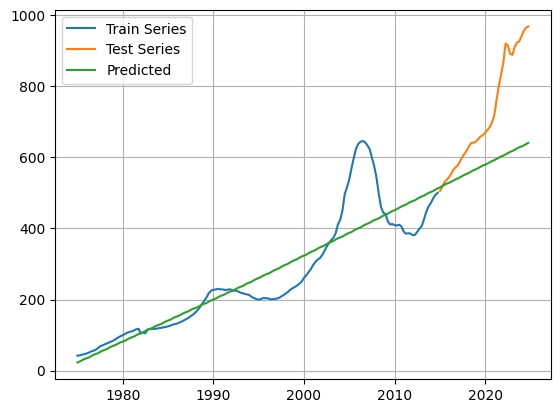

In [51]:
plt.plot(train_df['ds'], train_df['y'], label = "Train Series")
plt.plot(test_df['ds'], test_df['y'], label = "Test Series")
plt.plot(forecast['ds'], forecast['yhat'], label = "Predicted")
plt.legend()
plt.grid()

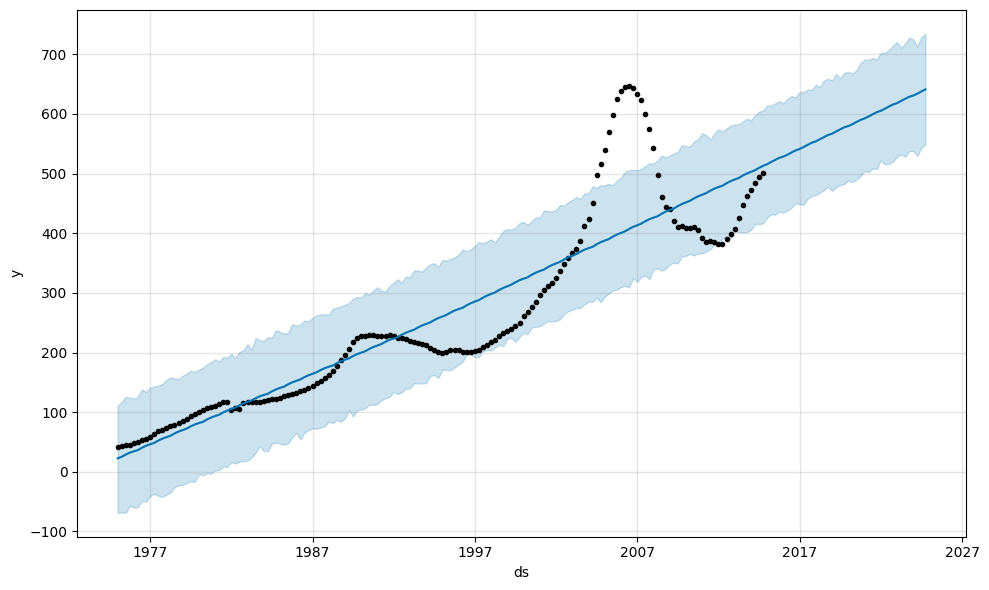

In [52]:
model.plot(forecast)
plt.show()

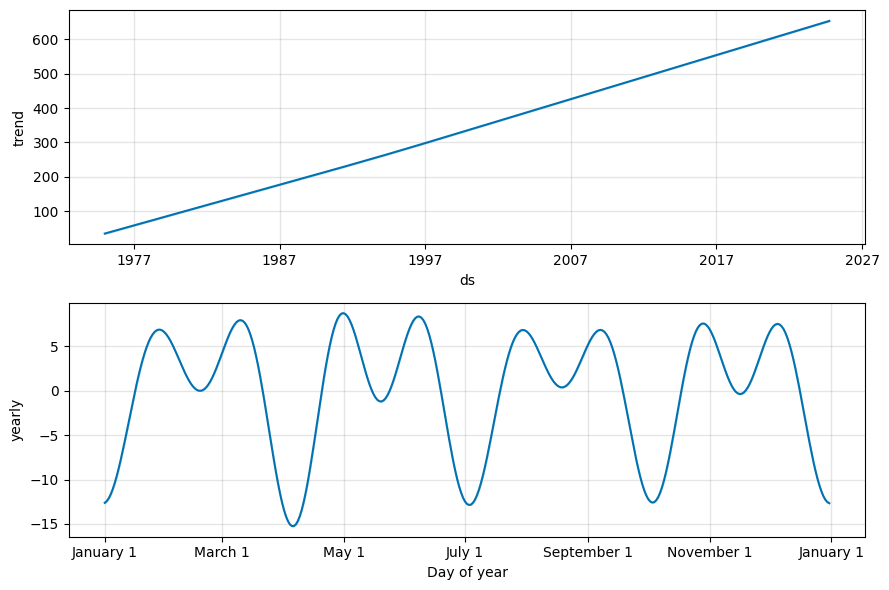

In [53]:
model.plot_components(forecast)
plt.show()
# trend and yearly seasonality